In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline
except NameError:
    pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os.path as osp

import torch

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from cifar_loader import load_cifar_dataset
from utils import shuffle_multiple_arrays, plot_model_results

In [3]:
seed = 34

### Prepare data

In [4]:
orig_train_images, orig_train_labels, test_images, test_labels, class_names = load_cifar_dataset("cifar-10-batches-py")
train_images, train_labels = shuffle_multiple_arrays(orig_train_images, orig_train_labels, seed=seed)
X_train = train_images.reshape(len(train_images), -1)
X_test = test_images.reshape(len(test_images), -1)

In [5]:
# n = 100
# X_train, train_labels, X_test, test_labels = X_train[:n], train_labels[:n], X_test[:n], test_labels[:n]

## Linear SVM

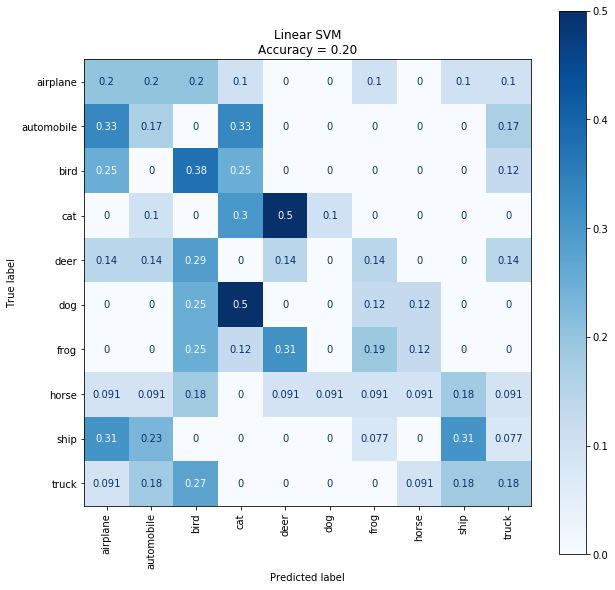

In [6]:
model = SVC(kernel="linear", random_state=seed)
model.fit(X_train, train_labels)
y_pred = model.predict(X_test)
y_true = test_labels
plot_model_results(y_true, y_pred, class_names, model_name="Linear SVM")

## SVM with RBF Kernel

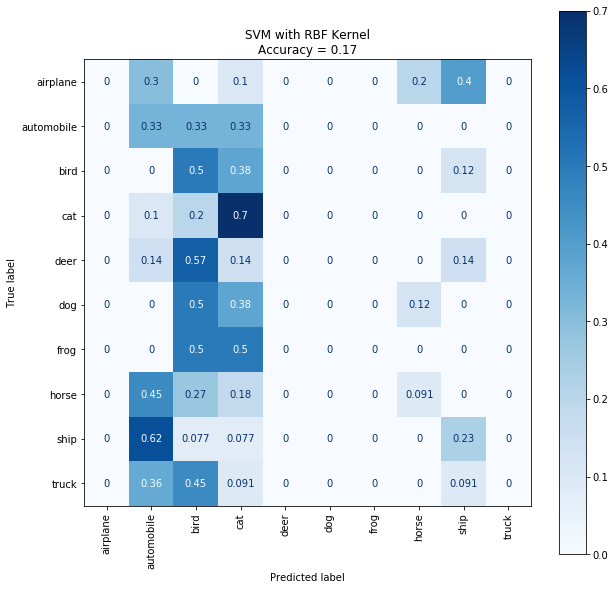

In [7]:
model = SVC(kernel="rbf", random_state=seed)
model.fit(X_train, train_labels)
y_pred = model.predict(X_test)
y_true = test_labels
plot_model_results(y_true, y_pred, class_names, model_name="SVM with RBF Kernel")